<a href="https://colab.research.google.com/github/ShreeKeshavan/Customer_Conversion_Prediction/blob/main/Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Data Analysis & Visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns


# Visualization modifires
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(style = 'darkgrid',font_scale=1.5)
%matplotlib inline

# To supress warnings
import warnings 
warnings.filterwarnings("ignore")   

In [4]:
df = pd.read_csv('/content/Customer_data.csv')

In [5]:
df.head(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,no
8,58,retired,married,primary,unknown,5,may,50,1,unknown,no
9,43,technician,single,secondary,unknown,5,may,55,1,unknown,no


In [6]:
# Shape of the data :
df.shape

(45211, 11)

In [7]:
# Dataframe information :
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


* From above output we can observe that 7 categorical & 4 numerical Attributes.

In [8]:
# Describing the data :
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


Handling Duplicates

In [9]:
df.duplicated().sum()

6

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(45205, 11)

* There are 6 duplicate records present in our dataset.
* I removed those 6 records

Unique Values

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [14]:
for col in df.select_dtypes(include= np.number).columns:
  print(f'{col} : {df[col].unique()}')
  print('--------------------------------------------')

age : [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
--------------------------------------------
day : [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
--------------------------------------------
dur : [ 261  151   76 ... 1298 1246 1556]
--------------------------------------------
num_calls : [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
--------------------------------------------


In [15]:
df.nunique()

age                 77
job                 12
marital              3
education_qual       4
call_type            3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         4
y                    2
dtype: int64

The dur column has more unique values comparing other columns

In [16]:
for col in df.select_dtypes(exclude= np.number).columns:
  print(f'{col} : {df[col].unique()}')
  print('--------------------------------------------')

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
--------------------------------------------
marital : ['married' 'single' 'divorced']
--------------------------------------------
education_qual : ['tertiary' 'secondary' 'unknown' 'primary']
--------------------------------------------
call_type : ['unknown' 'cellular' 'telephone']
--------------------------------------------
mon : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
--------------------------------------------
prev_outcome : ['unknown' 'failure' 'other' 'success']
--------------------------------------------
y : ['no' 'yes']
--------------------------------------------


In [17]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

* There are no null values currently because the null values are all filled with "unknown".

Handling Null

In [18]:
#to count the unknown values present in the dataframe 
has_unknown = df == "unknown"
columnwise_results = has_unknown.sum()
columnwise_results

age                   0
job                 288
marital               0
education_qual     1857
call_type         13017
day                   0
mon                   0
dur                   0
num_calls             0
prev_outcome      36953
y                     0
dtype: int64

In [19]:
for col in df.select_dtypes(exclude=np.number).columns:
  print(f'{col} : ')
  print(f'{df[col].value_counts()}')
  print('--------------------------------------------')

job : 
blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------------------------------------------
marital : 
married     27210
single      12788
divorced     5207
Name: marital, dtype: int64
--------------------------------------------
education_qual : 
secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64
--------------------------------------------
call_type : 
cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64
--------------------------------------------
mon : 
may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64
----------------

In [20]:
for col in df.select_dtypes(include=np.number).columns:
  print(f'{col} : ')
  print(f'{df[col].value_counts().head()}')
  print('--------------------------------------------')

age : 
32    2084
31    1996
33    1972
34    1929
35    1894
Name: age, dtype: int64
--------------------------------------------
day : 
20    2752
18    2308
21    2026
17    1939
6     1932
Name: day, dtype: int64
--------------------------------------------
dur : 
124    187
90     184
89     177
104    175
122    175
Name: dur, dtype: int64
--------------------------------------------
num_calls : 
1    17542
2    12503
3     5521
4     3520
5     1764
Name: num_calls, dtype: int64
--------------------------------------------


we can fill the null value with the mode value because we are having high difference between the value counts.

In [21]:
df.replace("unknown", np.nan, inplace=True)

In [22]:
df.isnull().sum()

age                   0
job                 288
marital               0
education_qual     1857
call_type         13017
day                   0
mon                   0
dur                   0
num_calls             0
prev_outcome      36953
y                     0
dtype: int64

In [23]:
#Nearly 37,000 of values are missing in the prev_outcome column. It does not add any value to the data to be imputed hence we can drop this
df.drop('prev_outcome', axis=1, inplace=True)

In [24]:
for col in df.columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [25]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
y                 0
dtype: int64

Handling Outliers

checking outliers

In [29]:
num_columns = df.select_dtypes(include=np.number).columns
num_columns

Index(['age', 'day', 'dur', 'num_calls'], dtype='object')

In [74]:
def Boxplot(col):
    plt.figure(figsize=(15, 10))
    x=1
    for i in col:
        plt.subplot(2, 2, x)
        sns.boxplot(x=i, data=df, palette='Paired')
        plt.title(f'Box plot of {i}', fontweight='black', fontsize=20, pad=20 )
        x += 1
    plt.tight_layout()
    plt.show()

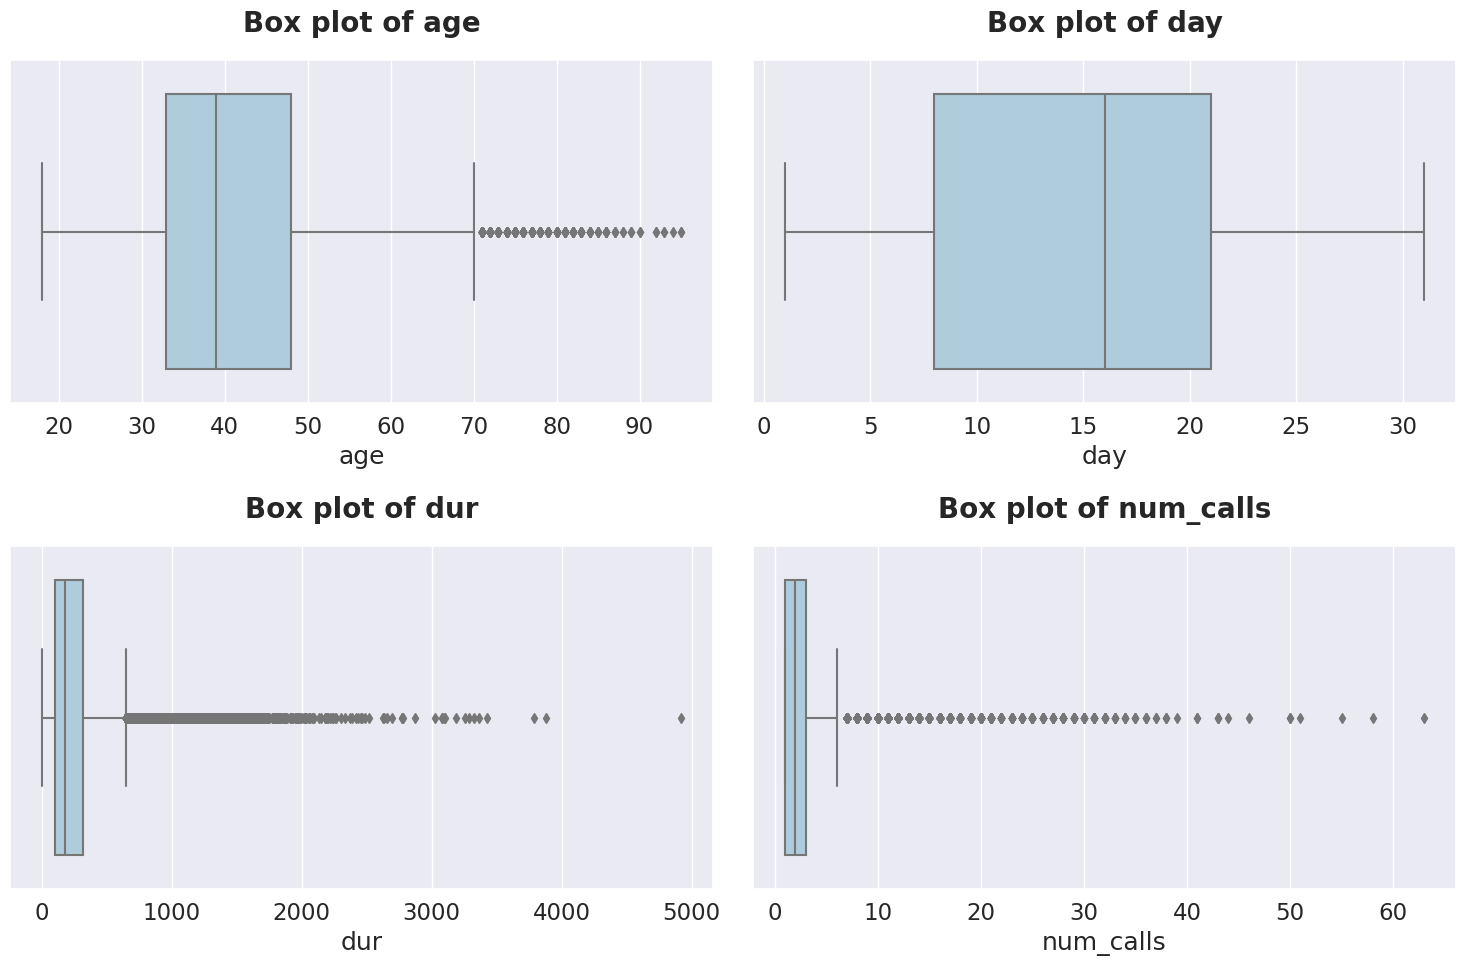

In [75]:
Boxplot(['age', 'day', 'dur', 'num_calls'])

From the box plot, we can infer the presence of outliers.

removing outliers